# Coordinate descent for L2 logistic regression

Author: Alexandre Gramfort, Mathurin Massias

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

## Load some data

In [10]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Make it binary
X = X[y < 2]
y = y[y < 2]

# add intercept column of ones
# X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)

y[y == 0] = -1

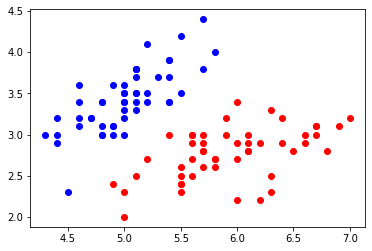

In [11]:
plt.scatter(X[y > 0, 0], X[y > 0, 1], color='r')
plt.scatter(X[y < 0, 0], X[y < 0, 1], color='b')

## Gradient descent

In [12]:
def f(w):
    pobj = np.sum(np.log(1. + np.exp(- y * np.dot(X, w))))
    return pobj

def f_grad(w):
    ywTx = y * np.dot(X, w)
    temp = 1. / (1. + np.exp(ywTx))
    grad = -np.dot(X.T, (y * temp))
    return grad

from scipy.optimize import check_grad
check_grad(f, f_grad, np.random.randn(2))

6.864694545561838e-06

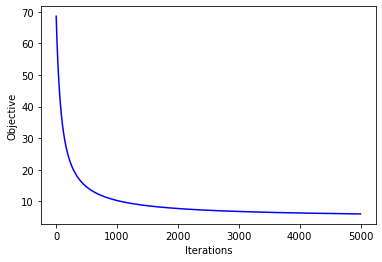

In [13]:
def grad_descent(f, f_grad, w0, step_size=0.01, max_iter=0):
    """Gradient descent with constant step size"""
    w = w0.copy()
    fws = []
    for k in range(max_iter):
        w -= step_size * f_grad(w)
        fws.append(f(w))
    return w, fws

n_features = X.shape[1]
x0 = np.zeros(n_features)
w_hat, fws = grad_descent(f, f_grad, x0, step_size=0.001, max_iter=5000)

plt.plot(fws, 'b')
plt.xlabel('Iterations')
plt.ylabel('Objective')
plt.show()

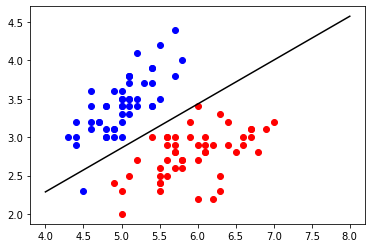

In [14]:
plt.scatter(X[y > 0, 0], X[y > 0, 1], color='r')
plt.scatter(X[y < 0, 0], X[y < 0, 1], color='b')
xx = np.linspace(4, 8, 10)
plt.plot(xx,  - xx * w_hat[0] / w_hat[1], 'k');

## Cyclic coordinate descent

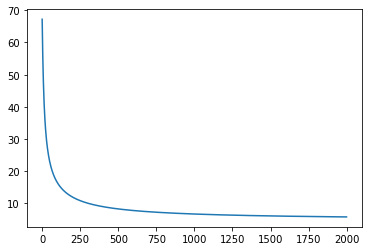

In [23]:
from numpy.linalg import norm

def sigmoid(t):
    """Sigmoid function"""
    return 1. / (1. + np.exp(-t))

def cd_logreg(X, y, n_iter):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    Xw = X.dot(w)
    all_objs = np.empty(n_iter)
    lips_const = (np.linalg.norm(X, ord=2, axis=0) ** 2) / 4.
    
    for t in range(n_iter):
        for j in range(n_features):
            old_w_j = w[j]
            grad_j = np.sum(- y * X[:, j] / (1 + np.exp(y * Xw)))
            w[j] -= grad_j / lips_const[j]
            Xw += X[:, j] * (w[j] - old_w_j)

        all_objs[t] = np.log(1. + np.exp(-y * Xw)).sum()
    
    return w, all_objs

w_hat, all_objs = cd_logreg(X, y, n_iter=2000)
plt.plot(all_objs)

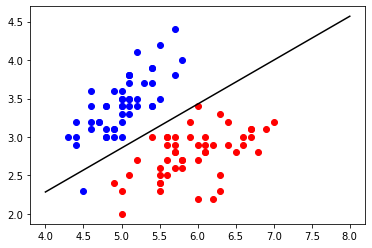

In [24]:
plt.scatter(X[y > 0, 0], X[y > 0, 1], color='r')
plt.scatter(X[y < 0, 0], X[y < 0, 1], color='b')
xx = np.linspace(4, 8, 10)
plt.plot(xx,  - xx * w_hat[0] / w_hat[1], 'k');

<div class="alert alert-success">
    <b>QUESTION 1:</b>
     <ul>
       <li>Modify the code to solve logistic regression with L2 regularization and a bias term.</li>
       <li>Modify the code to solve logistic regression with a bias term.</li>
    </ul>
</div>